# Parameter estimation for a Poisson Process (Python file)

For a Poisson process, we want to estimate the parameter $\lambda$, which determines the rate of an event for a given continous interval. The two distributions asociated for this process are the Poisson distribution:

$$
P(X = x) = \frac{\lambda^x}{x!} e^{-\lambda}
$$
That represents the frecuency $X$ of the event.
Then there is the Gamma dist, with a PDF:

$$
f(t) = \frac{\lambda^k}{\Gamma(k)} t^{k-1}e^{- \lambda t}
$$

Which represents the peridicity $t$ needed to get $k$ successes

The setup for the process is:

In [1]:
import numpy as np
import scipy.special as sp


# First we get a random number between 0 and 100 (to estimate)
random_number = 100*np.random.rand()
# As we want to estimate that number, we wont show it till the end

# We will define for once the functions for the likelihood and the gamma.
# The likelihood will take an interval t, an integer n (number of events) and a mean (mu)
def likelihood(t,n,mu):
    return (mu**n)/sp.gamma(n) * t**(n-1) *np.exp(-mu*t)

# We have the same function for the gamma, but now with parameters alpha and beta
# (just for the eassiness of notation)
def gamma(mu,alpha,beta):
    return (beta**alpha)/sp.gamma(alpha) * mu**(alpha-1) * np.exp(-beta*mu)

Now, in the following cells you can insert the parameters that you need for the priori and for the sample. You can allways replay this cell, which will show the graphs for the priori and posterior, the parameters, and info about the sample taken.
Recall that the variance and mean for the gamma distribution given hyperparameters $a$ and $l$ are:

$$
E(X) = \frac{a}{l}
$$

$$
Var(X) = \frac{a}{l^2}
$$

Where the mean is the value we expect (a are the ocurrences and l the period), and we can adjust those values depending on how tight we want our variance to be.

Now, to take the sample, we can both use Poisson or Gamma distribution, depending if we want to set the meassure "time" and meassure the ocurrences (n), or if we want to set the ocurrences to take, and meassure the "time". The user will have a say on this option

Using Gamma(25.0, 0.5) as prior distribution.
Number of events in interval 1.0: 41
Posterior distribution is Gamma(66.0, 1.5)


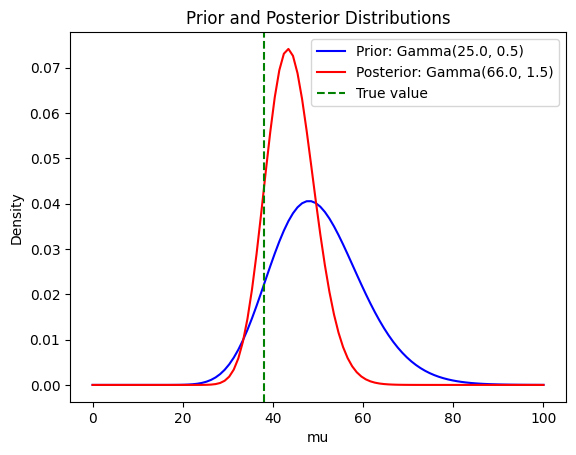

In [5]:
# We ask for the parameters of the prior gamma distribution
a_prior = float(input("Enter the 'a' parameter of the prior Gamma distribution: "))
b_prior = float(input("Enter the 'b' parameter of the prior Gamma distribution: "))
#print'em
print(f"Using Gamma({a_prior}, {b_prior}) as prior distribution.")

# We if we will use poisson events or a fixed number of events to take the sample
use_poisson = bool(input("Do you want to use Poisson events? (0 or 1 for no and yes): "))
if use_poisson == 1:
    # We ask for the interval to take the sample
    t_interval = float(input("Enter the time interval to take the sample: "))
    # We get the number of events in that interval
    n_sample = np.random.poisson(random_number*t_interval)
    print(f"Number of events in interval {t_interval}: {n_sample}")
else:
    # We ask for the number of events to take the sample
    n_sample = int(input("Enter the number of events to take the sample: "))
    # We get the time interval for that number of events given the random number, using a gamma distribution
    # (we use 1/random_number as the scale parameter of the gamma)
    t_interval = np.random.gamma(n_sample,1/random_number)
    print(f"Time interval for {n_sample} events: {t_interval}")

# Now we can compute the posterior parameters
a_post = a_prior + n_sample
b_post = b_prior + t_interval
print(f"Posterior distribution is Gamma({a_post}, {b_post})")

# Then we graph the prior and posterior distributions
import matplotlib.pyplot as plt
mu_values = np.linspace(0, 100, 100)
prior = gamma(mu_values, a_prior, b_prior)
posterior = gamma(mu_values, a_post, b_post)
plt.plot(mu_values, prior, label=f"Prior: Gamma({a_prior}, {b_prior})", color='blue')
plt.plot(mu_values, posterior, label=f"Posterior: Gamma({a_post}, {b_post})", color='red')
plt.axvline(random_number, color='green', linestyle='--', label='True value')
plt.title('Prior and Posterior Distributions')
plt.xlabel("mu")
plt.ylabel("Density")
plt.legend()